In [84]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, 2:] # petal length, petal width
y = iris.target # 3 different types of flowers


In [85]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [86]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = "Images_saved"

export_graphviz(
    tree_clf, 
    out_file="C:\\Users\\User\\PycharmProjects\\ScikitLearnBook\\tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled= True
)

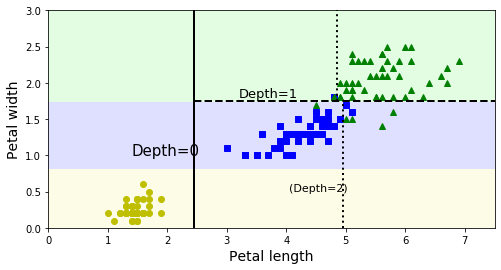

In [87]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes =[0, 7.5, 0, 3], iris_graph= True, legend=False, plot_training = True):
    x1s = np.linspace(axes[0], axes[1], 100) # create 100 points between x0 and xfinal
    x2s = np.linspace(axes[2], axes[3], 100) # create 100 points between y0 and yfinal
    x1, x2 = np.meshgrid(x1s, x2s) # return a 2 D arrays (100*100)
    X_new = np.c_[x1.ravel(), x2.ravel()] # reshape in 1 D array(1*1000)
    y_pred = clf.predict(X_new).reshape(x1.shape) # (100*100)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris_graph:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris_graph:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

Estimate class probabilities

In [88]:
tree_clf.predict_proba([[7, 2.5]]) 

array([[0.        , 0.02173913, 0.97826087]])

In [89]:
tree_clf.predict([[7, 2.5]])

array([2])

### CART training algorithm
Use scikit-learn moon dataset to illustrate the regularization of the tree classifier

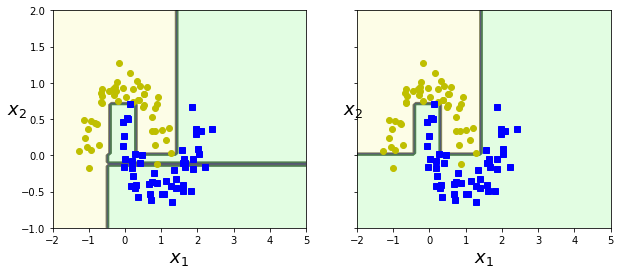

In [107]:
X_moon, y_moon = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)
tree_moon_clf1 = DecisionTreeClassifier(random_state=42)
tree_moon_clf2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=4)

tree_moon_clf1.fit(X_moon, y_moon)
tree_moon_clf2.fit(X_moon, y_moon)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(clf=tree_moon_clf1, X=X_moon, y=y_moon, axes=[-2, 5, -1, 2], iris_graph=False)
plt.sca(axes[1])
plot_decision_boundary(clf=tree_moon_clf2, X=X_moon, y=y_moon, axes=[-2, 5, -1, 2], iris_graph=False)
